# 28.03.2025

## Summary

So far, I've trained one separate model per each category in the MVTecAD dataset. Each of the models uses Patchcore to detect anomalies. All models are saved as .ckpt files in the models/ directory (not visible here because of gitignore). When I train a new model (patchcore_test.py) I update the corresponding .ckpt file (as of now I do it manually). These saved models can then be tested and used to make predictions on some images (patchcore_train.py). To help me visualize things I wrote some auxiliary functions (my_lib.py).

## Example - bottle

Example: testing a saved model for the bottle category.

In [1]:
import sys
sys.path.insert(1, './src')

In [2]:
from src.patchcore_test import test_on_category

<frozen importlib.util>:207: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
c:\Users\kocha\anaconda3\envs\dmml\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [3]:
test_on_category("bottle", 0)
# Technical detail: some models have been trained on wide_resnet50_2 backbone and some on resnet18 backbone.
# 0 - wide_resnet50_2
# 1 - resnet18
# The backbone should match the model, otherwise there'll be an error while reading a .ckpt file.

INFO:anomalib.models.components.base.anomalib_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:anomalib.data.datamodules.image.mvtecad:Found the dataset.
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at C:\Users\kocha\Desktop\Studies\AI Workshop 1\models\bottle\model.ckpt
c:\Users\kocha\anaconda3\envs\

Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 42.25850796699524 seconds
Throughput (batch_size=16) : 1.964101526367772 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │    0.9919999837875366     │
│        pixel_AUROC        │    0.9815165996551514     │
│       pixel_F1Score       │    0.7306636571884155     │
└───────────────────────────┴───────────────────────────┘

[{'image_AUROC': 1.0,
  'image_F1Score': 0.9919999837875366,
  'pixel_AUROC': 0.9815165996551514,
  'pixel_F1Score': 0.7306636571884155}]

Example: using a saved model to make a prediction on some images.

In [4]:
from src.patchcore_test import predict_on_category

In [5]:
predictions = predict_on_category("bottle", 0)

INFO:anomalib.models.components.base.anomalib_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at C:\Users\kocha\Desktop\Studies\AI Workshop 1\models\bottle\model.ckpt
c:\Users\kocha\anaconda3\envs\dmml\Lib\site-packages\lightning\pytorch\callbacks\model_checkpo

Predicting: |          | 0/? [00:00<?, ?it/s]

In [8]:
from src.my_lib import summarize_predictions, visualize_prediction

In [9]:
summarize_predictions(predictions)

Summarizing predictions...
Number of predictions: 83
Number of normal predictions: 20
Number of anomalous predictions: 63
Number of correct predictions: 83
Accuracy: 100.00%
Normal Indexes: [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
Anomalous Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
Correct Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
Incorrect Indexes: []


Image Path: ['C:\\Users\\kocha\\Desktop\\Studies\\AI Workshop 1\\datasets\\MVTecAD\\bottle\\test\\good\\000.png']
Anomaly Map Shape: torch.Size([1, 224, 224]), Min: 0.030383199453353882, Max: 0.3054972290992737
Predicted Label: tensor([False])
Predicted Score: tensor([0.2208])
Prediction Correct: True



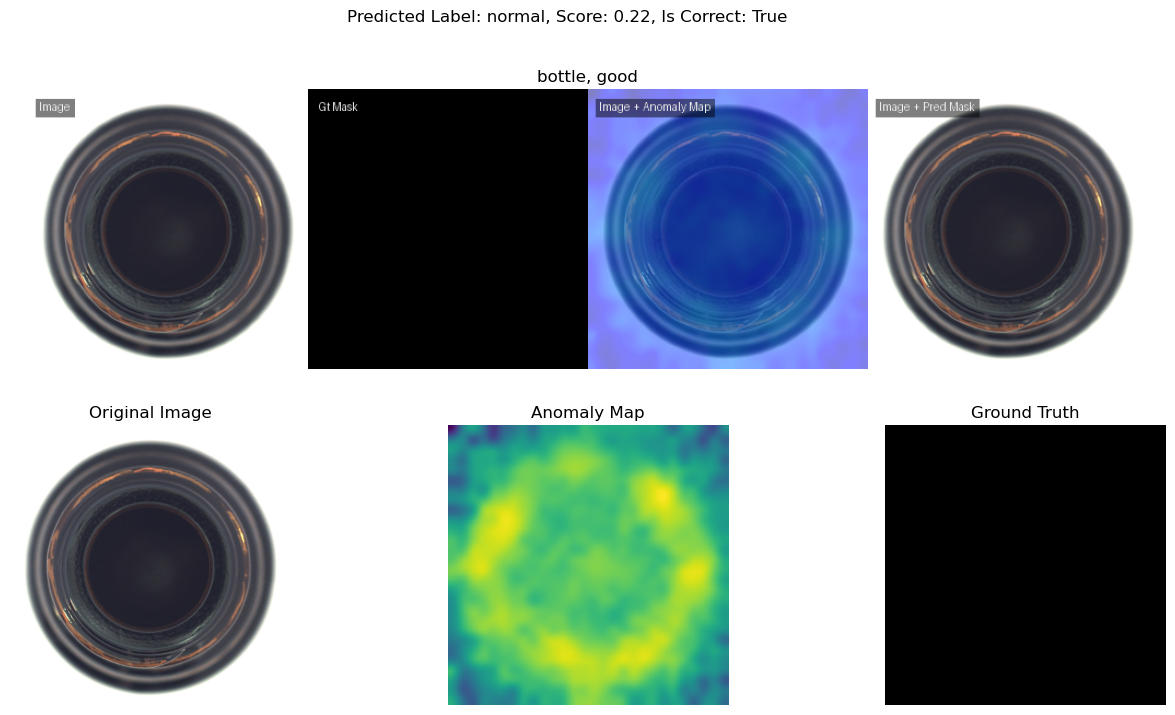

In [10]:
visualize_prediction(predictions[63])

Image Path: ['C:\\Users\\kocha\\Desktop\\Studies\\AI Workshop 1\\datasets\\MVTecAD\\bottle\\test\\broken_large\\000.png']
Anomaly Map Shape: torch.Size([1, 224, 224]), Min: 0.032653987407684326, Max: 0.8403326272964478
Predicted Label: tensor([True])
Predicted Score: tensor([0.9318])
Prediction Correct: True



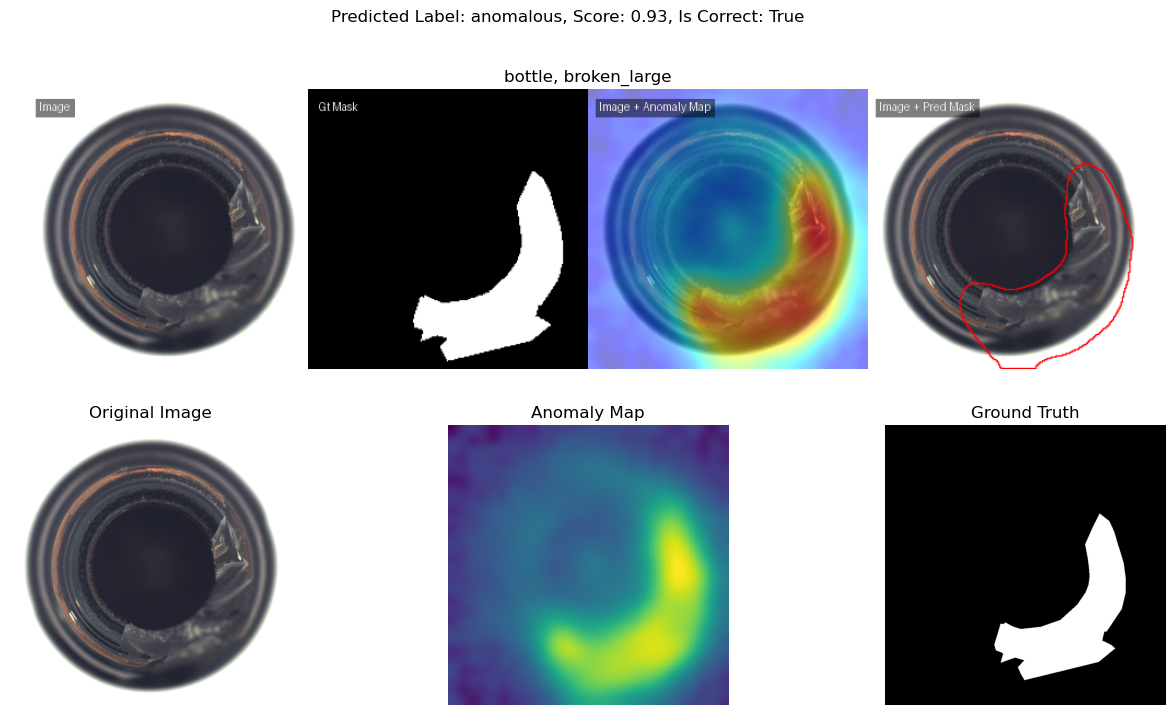

In [11]:
visualize_prediction(predictions[0])

## Also...

...I was trying to use the so called Growing Spheres algorithm to generate a first counterfactual explanation for an image. I cloned the repository with the implementation of the algorithm and tried to use it on several images to find a counterfactual explanation for each (growing_spheres_sandbox.py). Unfortunately, the algorithm seems to handle high dimensional data (like the images we have here) very poorly - I tried running it several times, on different images and with different parameters but it couldn't stop running, it was iterating endlessly, so for now I gave up. I may try to fight with it later but moving on to a different algorithm seems like a better idea to me right now.